In [1]:
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import rc
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle


sns.set_theme(style="white", font_scale=1.2,palette='viridis')
font = {'weight' : 'bold', 'family':'Nimbus Sans'}
rc('font', **font) 

In [2]:
df_ABE = pd.read_csv("../Analysis/be-hive/processed/ABE_['SYN', 'MIS']_context_score.csv")
df_CBE = pd.read_csv("../Analysis/be-hive/processed/CBE_['SYN', 'MIS']_context_score.csv")
df_ABE_mis = pd.read_csv('../Analysis/be-hive/processed/ABE_MIS_context_score.csv')
df_ABE_syn = pd.read_csv('../Analysis/be-hive/processed/ABE_SYN_context_score.csv')
df_CBE_mis = pd.read_csv('../Analysis/be-hive/processed/CBE_MIS_context_score.csv')
df_CBE_syn = pd.read_csv('../Analysis/be-hive/processed/CBE_SYN_context_score.csv')
df_ABE['categ'] = df_ABE['sg_PAM'].apply(lambda x: 'MIS' if x in df_ABE_mis['sg_PAM'].values else 'SYN')
df_CBE['categ'] = df_CBE['sg_PAM'].apply(lambda x: 'MIS' if x in df_CBE_mis['sg_PAM'].values else 'SYN')

In [3]:
def plot_box(df,BE):
    fig, ax = plt.subplots(figsize=(5, 5))

    # Boxplot with semi-transparent fill
    sns.boxplot(data=df, y='predicted read fraction', x='categ', ax=ax,
                showcaps=False, showfliers=False, width=0.5,
                boxprops={'alpha':0.5,'edgecolor': 'grey', 'linewidth': 1})
    boxes = ax.artists
    colors = ['skyblue', 'lightcoral']
    for i, box in enumerate(boxes):
        box.set_facecolor(colors[i])
    sns.stripplot(data=df, y='predicted read fraction', x='categ', ax=ax, 
                  jitter=True, alpha=0.3, color='grey', size=2)  # Smaller, lighter dots

    # Define x-axis labels with sample sizes
    categ_counts = df['categ'].value_counts()
    new_labels = ["Synonymous (n = {})".format(categ_counts.get('SYN', 0)), 
                  "Missense (n = {})".format(categ_counts.get('MIS', 0))]
    ax.set_xticklabels(new_labels, fontsize=12)

    # Extract data for statistical test
    syn_values = df[df['categ'] == 'SYN']['predicted read fraction']
    mis_values = df[df['categ'] == 'MIS']['predicted read fraction']

    # Perform Mann-Whitney U test (non-parametric test)
    stat, p_value = stats.mannwhitneyu(syn_values, mis_values, alternative='two-sided')

    # Remove unnecessary spines for a clean look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Predicted Read Fraction', fontsize=14, fontweight = 'bold')
    ax.set_xlabel("", fontsize=14,fontweight = 'bold')

    # Add statistical test result on the plot
    p_text = f"{BE} \n Mann-Whitney U test p-value = {p_value:.2e}" 
    ax.text(0.5, max(df['predicted read fraction']) * 1.05, p_text, 
            ha='center', fontsize=12, fontweight='bold', color='black')

    plt.tight_layout()
    # plt.savefig(f'./processed/{BE}_sg_efficiency.png', transparent = True, dpi = 800)
    plt.show()

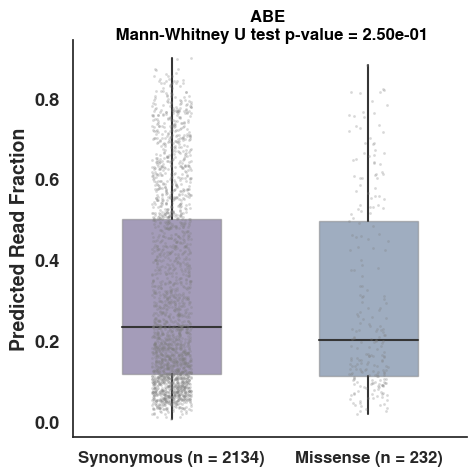

In [4]:
plot_box(df_ABE,'ABE')

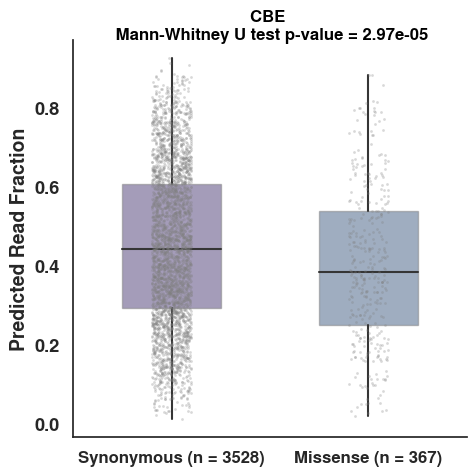

In [5]:
plot_box(df_CBE,'CBE')